## Import Necessary Libraries

In [1]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

# Create a Dataframe for reading and analysing the text files easily

In [3]:
df_train = pd.read_csv('../input/emotions-dataset-for-nlp/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('../input/emotions-dataset-for-nlp/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('../input/emotions-dataset-for-nlp/val.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

In [4]:
df_train.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

In [5]:
df_test.Sentiment.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Sentiment, dtype: int64

In [6]:
df_val.Sentiment.value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Sentiment, dtype: int64

## Reading the Train and Validation Data

In [8]:
X=df_train['Input']
X

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: Input, Length: 16000, dtype: object

In [9]:
lst=[]
for i in X:
  lst.append(len(i))


In [10]:
len1=pd.DataFrame(lst)
len1.describe()

,0
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


# Using The tokenizer Class to convert the sentences into word vectors

In [15]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [16]:
len(tokenizer.word_index)

15213

In [17]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [18]:
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [19]:
Y_train=df_train['Sentiment'].values


# One hot Encoding the Emotion Values

In [20]:
Y_train_f=to_categorical(Y_train)

In [21]:
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [22]:
X_val=df_val['Input']
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [23]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [24]:
Y_val_f=to_categorical(Y_val)

In [25]:
Y_val_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout


# Creating a Model

In [27]:
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 64)            973568    
_________________________________________________________________
dropout (Dropout)            (None, 80, 64)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense (Dense)                (None, 6)                 1926      
Total params: 1,479,174
Trainable params: 1,479,174
Non-trainable params: 0
_________________________________________________________________
None


# Compiling and running the model

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 15s 31ms/step - loss: 1.2340 - accuracy: 0.5016 - val_loss: 0.6679 - val_accuracy: 0.7480
Epoch 2/12
500/500 [==============================] - 14s 28ms/step - loss: 0.4706 - accuracy: 0.8384 - val_loss: 0.3355 - val_accuracy: 0.8775
Epoch 3/12
500/500 [==============================] - 14s 28ms/step - loss: 0.2781 - accuracy: 0.8979 - val_loss: 0.2795 - val_accuracy: 0.8900
Epoch 4/12
500/500 [==============================] - 14s 28ms/step - loss: 0.2075 - accuracy: 0.9227 - val_loss: 0.2182 - val_accuracy: 0.9140
Epoch 5/12
500/500 [==============================] - 14s 28ms/step - loss: 0.1551 - accuracy: 0.9404 - val_loss: 0.3880 - val_accuracy: 0.8655
Epoch 6/12
500/500 [==============================] - 14s 28ms/step - loss: 0.1320 - accuracy: 0.9510 - val_loss: 0.1934 - val_accuracy: 0.9265
Epoch 7/12
500/500 [==============================] - 14s 28ms/step - loss: 0.1093 - accuracy: 0.9581 - val_loss: 0.1967 - val_accuracy:

In [41]:
model_json =model.to_json()
with open("text_model.json", "w") as json_file:
    json_file.write(model_json)

In [42]:
model.save_weights('text_model.h5')

# Plotting the Loss and Accuracy Curves

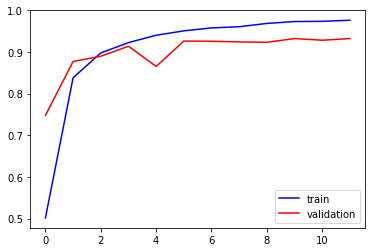

In [30]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

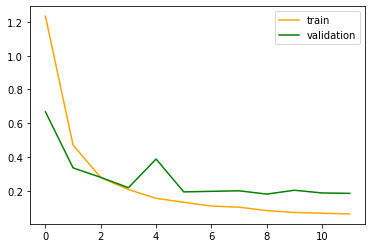

In [31]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

# Checking for Test Data

In [32]:
X_test=df_test['Input']
Y_test=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [33]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [34]:
Y_test_f=to_categorical(Y_test)

In [35]:
X_test_pad.shape

(2000, 80)

In [36]:
Y_test_f[:7]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

#Accuracy for Test Data

In [37]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 1s 8ms/step - loss: 0.1910 - accuracy: 0.9320


[0.1910363882780075, 0.9319999814033508]

# Plotting the Confusion matrix 

In [38]:
Y_pred=model.predict_classes(X_test_pad)

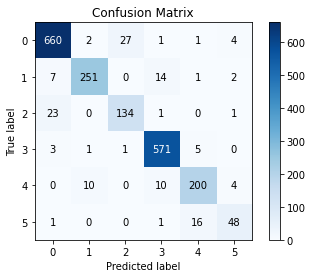

In [39]:
plot_confusion_matrix(Y_test,Y_pred)

In [40]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       695
           1       0.95      0.91      0.93       275
           2       0.83      0.84      0.83       159
           3       0.95      0.98      0.97       581
           4       0.90      0.89      0.89       224
           5       0.81      0.73      0.77        66

    accuracy                           0.93      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.93      0.93      0.93      2000



# Creating a Function to check for Your own Sentence

In [43]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key



In [44]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=get_key(model.predict_classes(sentence_padded))
  print("The emotion predicted is",ans)

# Check for Your Own Sentence

In [63]:
predict(str(input('Enter a sentence : ')))


Enter a sentence :  he fought with me


The emotion predicted is fear


In [ ]:
predict(str(input('Enter a sentence : ')))


In [ ]:
predict(str(input('Enter a sentence : ')))
